In [1]:
from pathlib import Path
import os
import numpy as np
import pandas as pd
import io
import sys
import logging
from new_strategy import TradingStrategy, Asset, BetSizingMethod, get_bet_sizing
from meta_strategy import MetaLabelingStrategy
import nbimporter
from backtest import Backtest
from add_features import generate_meta_labeled_data, merge_with_raw_features
from metalabel_backtest import MetaModelHandler
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
%load_ext autoreload
%autoreload 2

2025-07-11 16:44:57,055 - INFO - Strategy initialized for BTCUSD using FixedFractionalBetSizing


📦 Creating TradeSetup with:
  entry_time: 2020-01-02 00:00:00+00:00
  atr_14: nan, ma_14: nan, min_price_30: nan, max_price_30: nan
  context keys: ['ma_14', 'min_price_30', 'max_price_30', 'atr_14', 'daily_return', 'daily_volatility', 't10yie', 'vix_close', 'day_of_week', 'hour_of_day', 'dgs10', 'avg_return_30d', 'drawdown_30', 'attempt', 'ref_close', 'duration_minutes', 'session', 'rolling_f1', 'rolling_accuracy', 'rolling_precision', 'rolling_recall', 'n_total_seen', 'n_window_obs', 'session_code']
📦 Creating TradeSetup with:
  entry_time: 2020-01-02 02:07:00+00:00
  atr_14: nan, ma_14: nan, min_price_30: nan, max_price_30: nan
  context keys: ['ma_14', 'min_price_30', 'max_price_30', 'atr_14', 'daily_return', 'daily_volatility', 't10yie', 'vix_close', 'day_of_week', 'hour_of_day', 'dgs10', 'avg_return_30d', 'drawdown_30', 'attempt', 'ref_close', 'duration_minutes', 'session', 'rolling_f1', 'rolling_accuracy', 'rolling_precision', 'rolling_recall', 'n_total_seen', 'n_window_obs', 's

metalabel_backtest.ipynb:50: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  "        long_trades = trades_df[trades_df['direction'] == 'long']\n",
/Users/manuelheeren/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


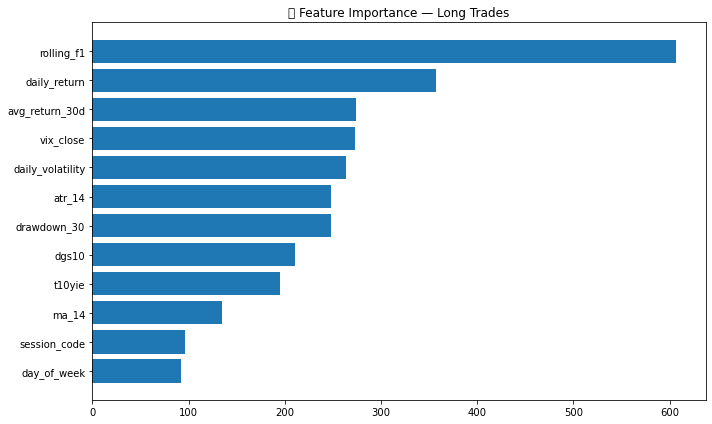

metalabel_backtest.ipynb:50: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  "        long_trades = trades_df[trades_df['direction'] == 'long']\n",
/Users/manuelheeren/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


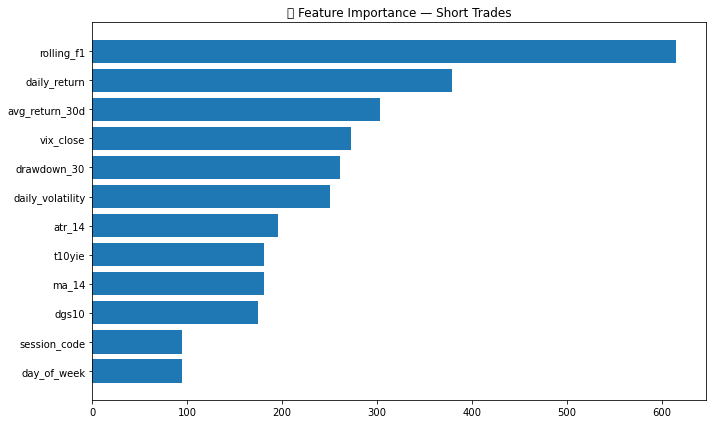

2025-07-11 16:50:40,361 - INFO - Strategy initialized for BTCUSD using FixedFractionalBetSizing
2025-07-11 16:51:31,227 - INFO - Strategy initialized for BTCUSD using FixedFractionalBetSizing



🔍 Entry Time Check (from shared_signals dict):
Type: <class 'dict'>
Keys in shared_signals: ['asian', 'london', 'us']
Type of entry_time: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


2025-07-11 16:51:31,607 - INFO - Strategy initialized for BTCUSD using FixedFractionalBetSizing
2025-07-11 16:51:31,679 - INFO - Strategy initialized for BTCUSD using FixedFractionalBetSizing



📊 Baseline features in .data:
['Gmt time', 'open', 'high', 'low', 'close', 'volume', 'date', 'time', 'asian_session', 'london_session', 'us_session', 'daily_high', 'daily_low', 'daily_close', 'true_range', 'atr_14', 'ma_14', 'ma_30', 'ma_100', 'day_of_week', 'week_number', 'hour_of_day', 'max_price_14', 'min_price_14', 'max_price_30', 'min_price_30', 'max_price_100', 'min_price_100', 'drawdown_static', 'drawdown_30', 't10yie', 'cpiaucsl', 'vix_close', 'dtwexbgs', 'dgs10', 'daily_return', 'daily_volatility', 'regime', 'regime_label', 'avg_return_30d']

📊 Filtered features in .data:
['Gmt time', 'open', 'high', 'low', 'close', 'volume', 'date', 'time', 'asian_session', 'london_session', 'us_session', 'daily_high', 'daily_low', 'daily_close', 'true_range', 'atr_14', 'ma_14', 'ma_30', 'ma_100', 'day_of_week', 'week_number', 'hour_of_day', 'max_price_14', 'min_price_14', 'max_price_30', 'min_price_30', 'max_price_100', 'min_price_100', 'drawdown_static', 'drawdown_30', 't10yie', 'cpiaucsl'

2025-07-11 16:51:54,632 - INFO - Exported detailed trades to data/results/trades_detailed_BTCUSD_fixed.csv
2025-07-11 16:51:54,697 - INFO - Saved backtest results to data/results/backtest_results_BTCUSD_fixed.txt



=== BTCUSD Backtest Results ===
Bet Sizing Strategy: fixedfractionalbetsizing

Period: 2023-05-22 to 2024-11-01

ASIAN Session Performance:
Initial Capital: $100,000.00
Final Capital: $98,008.71
Total PnL: $-1,991.29
Return: -1.99%
Win Rate: 44.31% (292W/367L)
Max Drawdown: 4.44%
Sharpe Ratio: -0.46
Skewness: 0.612
Excess Kurtosis: -0.862

Attempt Analysis:

  Attempt 1:
  Trades: 380 (57.7% of session trades)
  PnL: $-1,539.47
  Win Rate: 48.16% (183W/197L)
  Average Win: $92.47
  Average Loss: $-95.16

  Attempt 2:
  Trades: 181 (27.5% of session trades)
  PnL: $-1,142.83
  Win Rate: 38.67% (70W/111L)
  Average Win: $129.26
  Average Loss: $-91.81

  Attempt 3:
  Trades: 98 (14.9% of session trades)
  PnL: $691.02
  Win Rate: 39.80% (39W/59L)
  Average Win: $147.19
  Average Loss: $-85.58

LONDON Session Performance:
Initial Capital: $100,000.00
Final Capital: $104,500.41
Total PnL: $4,500.41
Return: 4.50%
Win Rate: 46.75% (302W/344L)
Max Drawdown: 1.82%
Sharpe Ratio: 0.94
Skewness:

2025-07-11 16:51:54,987 - INFO - Exported detailed trades to data/results/trades_detailed_BTCUSD_fixed.csv
2025-07-11 16:51:55,052 - INFO - Saved backtest results to data/results/backtest_results_BTCUSD_fixed.txt



=== BTCUSD Backtest Results ===
Bet Sizing Strategy: fixedfractionalbetsizing

Period: 2023-05-22 to 2024-10-31

ASIAN Session Performance:
Initial Capital: $100,000.00
Final Capital: $101,275.86
Total PnL: $1,275.86
Return: 1.28%
Win Rate: 53.70% (58W/50L)
Max Drawdown: 0.70%
Sharpe Ratio: 1.72
Skewness: 0.261
Excess Kurtosis: -1.004

Attempt Analysis:

  Attempt 1:
  Trades: 76 (70.4% of session trades)
  PnL: $956.31
  Win Rate: 57.89% (44W/32L)
  Average Win: $84.18
  Average Loss: $-88.63

  Attempt 2:
  Trades: 23 (21.3% of session trades)
  PnL: $251.10
  Win Rate: 43.48% (10W/13L)
  Average Win: $142.04
  Average Loss: $-89.94

  Attempt 3:
  Trades: 9 (8.3% of session trades)
  PnL: $68.45
  Win Rate: 44.44% (4W/5L)
  Average Win: $126.04
  Average Loss: $-87.14

LONDON Session Performance:
Initial Capital: $100,000.00
Final Capital: $101,056.28
Total PnL: $1,056.28
Return: 1.06%
Win Rate: 50.00% (33W/33L)
Max Drawdown: 0.30%
Sharpe Ratio: 2.37
Skewness: 0.340
Excess Kurtosis


🔹 Baseline Strategy:
  Bear: Trades = 833, Avg PnL = -0.97, Total PnL = -805.30, Win Rate = 42.26%
  Bull: Trades = 468, Avg PnL = 3.19, Total PnL = 1493.72, Win Rate = 50.00%
  Neutral: Trades = 673, Avg PnL = 5.96, Total PnL = 4013.38, Win Rate = 45.77%


🔹 Meta-Filtered Strategy:
  Bear: Trades = 55, Avg PnL = -5.29, Total PnL = -290.99, Win Rate = 43.64%
  Bull: Trades = 141, Avg PnL = 12.77, Total PnL = 1800.25, Win Rate = 53.90%
  Neutral: Trades = 41, Avg PnL = 36.01, Total PnL = 1476.51, Win Rate = 56.10%


✅ CSVs saved to: results_metalabel
 - baseline_btcusd_fixed.csv
 - filtered_btcusd_fixed.csv

✅ Summaries saved to:
 - baseline_btcusd_fixed.txt
 - filtered_btcusd_fixed.txt

✅ Full evaluation written to: results_metalabel/comparison/evaluation_btcusd_fixed.txt


In [2]:
def split_price_data(price_data: pd.DataFrame, split_ratio: float = 0.7):
    split_idx = int(len(price_data) * split_ratio)
    return price_data.iloc[:split_idx], price_data.iloc[split_idx:]

def run_training_phase(asset: Asset, method: BetSizingMethod, price_data: pd.DataFrame, feature_cols: list):
    # Run base strategy
    past_returns = price_data['close'].pct_change().dropna()
    bet_sizing = get_bet_sizing(method, past_returns)
    
    strategy = TradingStrategy(price_data, asset.value, bet_sizing, method)
    strategy.generate_signals()
    strategy.simulate_trades()
    
    trade_df = strategy.get_trade_data()
    labeled = generate_meta_labeled_data(trade_df)
    #labeled_with_features = merge_with_raw_features(labeled, asset.value)
    labeled_with_features = labeled
    
    print(labeled_with_features.columns)
    return labeled_with_features

def train_meta_model(train_df: pd.DataFrame, feature_cols: list) -> MetaModelHandler:
    model = MetaModelHandler()
    model.train(train_df, feature_cols)
    return model

def run_parallel_evaluation(asset, method, test_price_data, signals, meta_model, feature_cols):
    past_returns = test_price_data['close'].pct_change().dropna()
    bet_sizing = get_bet_sizing(method, past_returns)

    #  First, initialize Meta strategy to access feature-enriched data
    meta_strategy = MetaLabelingStrategy(
        test_price_data.copy(), asset.value, bet_sizing, method,
        meta_model_handler=meta_model
    )
    feature_data = meta_strategy.data.copy()

    #  Use feature_data for both strategies
    baseline = TradingStrategy(feature_data.copy(), asset.value, bet_sizing, method)
    baseline.trade_signals = signals

    filtered = MetaLabelingStrategy(feature_data.copy(), asset.value, bet_sizing, method, meta_model_handler=meta_model,feature_cols=feature_cols)
    filtered.trade_signals = signals

    print("\n📊 Baseline features in .data:")
    print(baseline.data.columns.tolist())

    print("\n📊 Filtered features in .data:")
    print(filtered.data.columns.tolist())
    print("\n🕒 Baseline index:", baseline.data.index.name, baseline.data.index.dtype)
    print("🕒 Filtered index:", filtered.data.index.name, filtered.data.index.dtype)

    baseline.simulate_trades()
    filtered.simulate_trades()

    return baseline, filtered


def compare_backtests(baseline: TradingStrategy, filtered: MetaLabelingStrategy, asset: Asset, method: BetSizingMethod):
    def capture_regime_stats(strategy, name):
        buffer = io.StringIO()
        sys.stdout = buffer
        print(f"\n🔹 {name} Strategy:")

        df = strategy.get_trade_data()

        if 'regime_label' not in df.columns or 'pnl' not in df.columns:
            print("Required columns not found in trade data.")
        else:
            grouped = df.groupby('regime_label')

            for regime, group in grouped:
                trades = len(group)
                avg_pnl = group['pnl'].mean()
                total_pnl = group['pnl'].sum()
                wins = (group['pnl'] > 0).sum()
                winrate = wins / trades if trades > 0 else 0

                print(f"  {regime}: Trades = {trades}, "
                      f"Avg PnL = {avg_pnl:.2f}, Total PnL = {total_pnl:.2f}, "
                      f"Win Rate = {winrate:.2%}")

        sys.stdout = sys.__stdout__
        return buffer.getvalue()
    
    print("\n[BASELINE]")
    baseline_bt = Backtest(baseline)
    baseline_bt.run_analysis()
    baseline_buffer = io.StringIO()
    sys.stdout = baseline_buffer
    baseline_bt.print_summary()
    sys.stdout = sys.__stdout__
    baseline_summary = baseline_buffer.getvalue()
    print(baseline_summary)

    print("\n[META-FILTERED]")
    filtered_bt = Backtest(filtered)
    filtered_bt.run_analysis()
    filtered_buffer = io.StringIO()
    sys.stdout = filtered_buffer
    filtered_bt.print_summary()
    sys.stdout = sys.__stdout__
    filtered_summary = filtered_buffer.getvalue()
    print(filtered_summary)

    print(f"\nTrades Rejected by Meta-Model: {filtered.rejected_trades}")

    output_dir = "results_metalabel"
    os.makedirs(output_dir, exist_ok=True)

    asset_name = asset.value.lower()
    method_name = method.value.lower()

    baseline_csv = f"baseline_{asset_name}_{method_name}.csv"
    filtered_csv = f"filtered_{asset_name}_{method_name}.csv"
    baseline_txt = f"baseline_{asset_name}_{method_name}.txt"
    filtered_txt = f"filtered_{asset_name}_{method_name}.txt"

    baseline.get_trade_data().to_csv(os.path.join(output_dir, baseline_csv), index=False)
    filtered.get_trade_data().to_csv(os.path.join(output_dir, filtered_csv), index=False)

    with open(os.path.join(output_dir, baseline_txt), "w") as f:
        f.write(baseline_summary)

    with open(os.path.join(output_dir, filtered_txt), "w") as f:
        f.write(filtered_summary)
    
        # Run and print regime comparisons
    print("\n📈 Regime Comparison")
    regime_baseline = capture_regime_stats(baseline, "Baseline")
    regime_filtered = capture_regime_stats(filtered, "Meta-Filtered")

    print(regime_baseline)
    print(regime_filtered)

    # Append to the already existing summary files
    with open(baseline_txt, "a") as f:
        f.write("\n\n=== Regime Analysis ===\n")
        f.write(regime_baseline)

    with open(filtered_txt, "a") as f:
        f.write("\n\n=== Regime Analysis ===\n")
        f.write(regime_filtered)

    print(f"\n✅ CSVs saved to: {output_dir}")
    print(f" - {baseline_csv}")
    print(f" - {filtered_csv}")
    print(f"\n✅ Summaries saved to:")
    print(f" - {baseline_txt}")
    print(f" - {filtered_txt}")

def evaluate_backtest_and_regimes(
    baseline_path: str,
    filtered_path: str,
    txt_output_path: str = "results_metalabel/comparison/evaluation_summary.txt"
):
    buffer = io.StringIO()
    sys.stdout = buffer  # Redirect print to buffer

    print("\n📊 Evaluation from Final CSVs")

    def compute_backtest_kpis(df: pd.DataFrame, label: str):
        print(f"\n📈 {label} Backtest Summary (Per Session Evaluation)")

        df = df[df['position_size'] > 0]

        if 'pnl' not in df.columns or 'session' not in df.columns:
            print("❌ Missing required columns ('pnl', 'session').")
            return

        session_stats = []

        for session, group in df.groupby("session"):
            group = group.sort_values("exit_time")

            if group.empty:
                continue

            # Build capital curve on actual trade exits
            capital = 100_000  # consistent with old method
            capital_curve = []

            for pnl in group['pnl']:
                capital += pnl
                capital_curve.append(capital)

            group = group.copy()
            group['capital_curve'] = capital_curve
            returns = pd.Series(capital_curve).pct_change().dropna()

            # Sharpe: based on trading days only
            if len(returns) >= 2:
                mean_return = returns.mean()
                vol = returns.std()
                sharpe = (mean_return / vol) * np.sqrt(252) if vol > 0 else 0
            else:
                sharpe = 0

            # Max drawdown from capital curve
            cumulative = pd.Series(capital_curve).cummax()
            drawdown = (cumulative - capital_curve) / cumulative
            max_drawdown = drawdown.max()

            wins = (group['pnl'] > 0).sum()
            losses = (group['pnl'] <= 0).sum()
            win_rate = wins / (wins + losses) if (wins + losses) > 0 else 0

            total_pnl = group["pnl"].sum()
            final_capital = capital_curve[-1]

            session_stats.append({
                "session": session,
                "total_pnl": total_pnl,
                "final_capital": final_capital,
                "win_rate": win_rate,
                "sharpe": sharpe,
                "max_drawdown": max_drawdown,
                "trades": len(group)
            })

            print(f"\n🔹 Session: {session}")
            print(f"  Final Capital: ${final_capital:,.2f}")
            print(f"  Total PnL:     ${total_pnl:,.2f}")
            print(f"  Win Rate:      {win_rate:.2%} ({wins}W / {losses}L)")
            print(f"  Max Drawdown:  {max_drawdown:.2%}")
            print(f"  Sharpe Ratio:  {sharpe:.2f}")
            print(f"  Total Trades:  {len(group)}")

        # Optional combined stats
        combined_pnl = sum(s["total_pnl"] for s in session_stats)
        print(f"\n📊 Combined PnL across all sessions: ${combined_pnl:,.2f}")


    def compute_regime_stats(df: pd.DataFrame, label: str):
        print(f"\n📊 {label} Regime Breakdown by Session")

        if "regime_label" not in df.columns or "pnl" not in df.columns or "session" not in df.columns:
            print("❌ Missing required columns ('regime_label', 'pnl', or 'session').")
            return

        session_groups = df.groupby("session")
        for session, session_df in session_groups:
            print(f"\n🔹 Session: {session}")
            regime_groups = session_df.groupby("regime_label")
            for regime, group in regime_groups:
                trades = len(group)
                avg_pnl = group["pnl"].mean()
                total_pnl = group["pnl"].sum()
                wins = (group["pnl"] > 0).sum()
                win_rate = wins / trades if trades > 0 else 0

                print(f"  - Regime: {regime}")
                print(f"    Trades:    {trades}")
                print(f"    Avg PnL:   ${avg_pnl:.2f}")
                print(f"    Total PnL: ${total_pnl:.2f}")
                print(f"    Win Rated:  {win_rate:.2%}")


    # === Load CSVs ===
    baseline_df = pd.read_csv(baseline_path, parse_dates=["entry_time", "exit_time"])
    filtered_df = pd.read_csv(filtered_path, parse_dates=["entry_time", "exit_time"])

    # === Compute Metrics ===
    compute_backtest_kpis(baseline_df, "Baseline")
    compute_regime_stats(baseline_df, "Baseline")

    compute_backtest_kpis(filtered_df, "Meta-Filtered")
    compute_regime_stats(filtered_df, "Meta-Filtered")

    # === Write output to TXT file ===
    sys.stdout = sys.__stdout__  # Restore stdout
    with open(txt_output_path, "w") as f:
        f.write(buffer.getvalue())

    print(f"\n✅ Full evaluation written to: {txt_output_path}")


if __name__ == "__main__":
    logging.basicConfig(level=logging.INFO)

    asset = Asset.BTCUSD
    method = BetSizingMethod.FIXED

    feature_cols = ["drawdown_30","atr_14","ma_14","avg_return_30d","daily_return","daily_volatility","vix_close","rolling_f1","day_of_week","t10yie","session_code","dgs10"] 
    price_path = Path(f"data/processed/{asset.value}/combined_data.csv")
    price_data = pd.read_csv(price_path, index_col='timestamp', parse_dates=True)

    # Split
    train_data, test_data = split_price_data(price_data)

    # Training
    train_trades = run_training_phase(asset, method, train_data, feature_cols)
    
    #clean_features = train_trades[feature_cols].replace([np.inf, -np.inf], np.nan).dropna()
    #train_trades_cleaned = train_trades.loc[clean_features.index]
    train_trades_cleaned = train_trades.replace([np.inf, -np.inf], np.nan).dropna(subset=feature_cols)

    train_trades_cleaned.to_csv("results_metalabel/train_data_debug.csv", index=False)
    print("✅ Training data saved to results_metalabel/train_data_debug.csv")

    meta_model = train_meta_model(train_trades_cleaned, feature_cols)

    # Reuse signals
    signal_gen = TradingStrategy(test_data.copy(), asset.value, get_bet_sizing(method), method)
    signal_gen.generate_signals()
    shared_signals = signal_gen.trade_signals

    print("\n🔍 Entry Time Check (from shared_signals dict):")
    print("Type:", type(shared_signals))
    print("Keys in shared_signals:", list(shared_signals.keys()))

    # Try to peek at the first signal (depending on structure)
    first_key = next(iter(shared_signals))
    first_signal_list = shared_signals[first_key]
    first_signal = first_signal_list[0]  # Get the first signal from the list
    print("Type of entry_time:", type(first_signal['entry_time']))

    # Evaluation
    base_strat, filtered_strat = run_parallel_evaluation(
        asset, method, test_data, shared_signals, meta_model, feature_cols
    )

    # Compare
    compare_backtests(base_strat, filtered_strat, asset, method)
    evaluate_backtest_and_regimes(
    baseline_path=f"results_metalabel/baseline_{asset.value.lower()}_{method.value.lower()}.csv",
    filtered_path=f"results_metalabel/filtered_{asset.value.lower()}_{method.value.lower()}.csv",
    txt_output_path=f"results_metalabel/comparison/evaluation_{asset.value.lower()}_{method.value.lower()}.txt"

)


In [ ]:
import pandas as pd

# === CONFIG ===
file_path = ''   # Replace with your actual file path
timestamp_column = 'timestamp'  # Adjust if your timestamp column is named differently
expected_freq = '1min'         # Use '1min' or '1D' depending on your data

# === LOAD DATA ===
df = pd.read_csv(file_path, parse_dates=[timestamp_column])
df.set_index(timestamp_column, inplace=True)
df.sort_index(inplace=True)

# === INSPECT RANGE ===
start = df.index.min()
end = df.index.max()
print(f"\n📅 Data time range: {start} to {end}")
print(f"📊 Number of rows: {len(df)}")

# === CHECK COLUMNS ===
required_cols = ['open', 'high', 'low', 'close']
missing_cols = [col for col in required_cols if col not in df.columns]
if missing_cols:
    print(f"❌ Missing required columns: {missing_cols}")
else:
    print("✅ All required OHLC columns are present.")

# === CHECK FOR MISSING TIMESTAMPS ===
full_index = pd.date_range(start=start, end=end, freq=expected_freq)
missing_timestamps = full_index.difference(df.index)

print(f"\n⏳ Total expected timestamps: {len(full_index)}")
print(f"❌ Missing timestamps: {len(missing_timestamps)}")

if not missing_timestamps.empty:
    print("🔍 Sample missing timestamps:", missing_timestamps[:10])

# Optional: save missing timestamps to file
# pd.Series(missing_timestamps).to_csv("missing_timestamps.csv", index=False)
